In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.stats import uniform
from scipy.stats import norm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
import csv
import pandas as pd
import time
import os
from datetime import datetime, timedelta

READ DATA FROM CITIZEN SCIENTIST NETWORK AND WRITE IT TO A SINGLE FILE

In [ ]:
#Read long raw files and filter them by month, them wrinte each file.
#Dec
listdir=os.listdir("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/SIATA_CS/SplitDatosCC/Split/")
header=["codigoSerial", "fecha", "hora", "fechaHora", "temperatura", "humedad_relativa", "pm1_df", "pm10_df", "pm25_df", "pm1_nova", "pm10_nova", "pm25_nova", "calidad_temperatura", "calidad_humedad_relativa", "calidad_pm1_df", "calidad_pm10_df", "calidad_pm25_df", "calidad_pm1_nova", "calidad_pm10_nova", "calidad_pm25_nova"]
datatypes={"codigoSerial":np.uint16, "temperatura":np.float16, "humedad_relativa":np.float16, "pm1_df":np.float32, "pm10_df":np.float32, "pm25_df":np.float32, "pm1_nova":np.float32, "pm10_nova":np.float32, "pm25_nova":np.float32}

for files in listdir:
    print(files)
    t0= time.time()
    df = pd.read_csv('C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/SIATA_CS/SplitDatosCC/Split/'+files,header=None, names=header, usecols=header ,parse_dates=["fecha","hora","fechaHora"],skiprows=1)
    df_sample=df[(df['fecha'] >= '2019-12-01') & (df['fecha'] <= '2019-12-31')]
    del df
    df_sample.to_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/SIATA_CS/SplitDatosCC/sample_Dec/"+files,header=False,index=False)
    t1 = time.time() - t0
    print("Elapsed Time: ", t1)
    del df_sample

In [ ]:
#Read short files and append them into one file containing info by month.
listdir=os.listdir("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/SIATA_CS/SplitDatosCC/sample_Dec/")
header=["codigoSerial", "fecha", "hora", "fechaHora", "temperatura", "humedad_relativa", "pm1_df", "pm10_df", "pm25_df", "pm1_nova", "pm10_nova", "pm25_nova", "calidad_temperatura", "calidad_humedad_relativa", "calidad_pm1_df", "calidad_pm10_df", "calidad_pm25_df", "calidad_pm1_nova", "calidad_pm10_nova", "calidad_pm25_nova"]
datatypes={"codigoSerial":np.uint16, "temperatura":np.float16, "humedad_relativa":np.float16, "pm1_df":np.float32, "pm10_df":np.float32, "pm25_df":np.float32, "pm1_nova":np.float32, "pm10_nova":np.float32, "pm25_nova":np.float32}
df_sample = pd.DataFrame(columns =header)

for files in listdir:#to iterate over the files in the folder
    print(files)
    df = pd.read_csv('C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/SIATA_CS/SplitDatosCC/sample_Dec/'+files, header=None, names=header, usecols=header , dtype=datatypes,parse_dates=["fecha","hora","fechaHora"])
    df_sample=df_sample.append(df, ignore_index = True)#append every file's dataframe
    del df

df_sample.sort_values(by=['fechaHora'],ignore_index=True)
df_sample.to_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/SIATA_CS/SplitDatosCC/Samples/"+"December.csv",header=False,index=False)
grouped=df_sample.groupby(df_sample.codigoSerial)
CC1 = grouped.get_group(1).sort_values(by=['fechaHora'],ignore_index=True)
del df_sample
del grouped
CC1

In [ ]:
CC1["humedad_relativa"][CC1["humedad_relativa"]<0]=np.nan
CC1["temperatura"][CC1["temperatura"]<0]=np.nan
CC1["pm10_df"][CC1["pm10_df"]<0]=np.nan
CC1["pm10_nova"][CC1["pm10_nova"]<0]=np.nan
CC1["pm25_df"][CC1["pm25_df"]<0]=np.nan
CC1["pm25_nova"][CC1["pm25_nova"]<0]=np.nan
plt.figure(figsize=(15,2))
plt.plot(CC1["fechaHora"],CC1["temperatura"])
plt.figure(figsize=(15,2))
plt.plot(CC1["fechaHora"],CC1["humedad_relativa"])
plt.figure(figsize=(15,2))
plt.plot(CC1["fechaHora"],CC1["pm10_df"])
plt.plot(CC1["fechaHora"],CC1["pm25_df"])
plt.figure(figsize=(15,2))
plt.plot(CC1["fechaHora"],CC1["pm10_nova"])
plt.plot(CC1["fechaHora"],CC1["pm25_nova"])
plt.figure(figsize=(5,5))
plt.plot(CC1["pm10_df"],CC1["pm10_nova"],'o')
plt.grid()

READ DATA FROM SIATA STATIONS NETWORK AND WRITE IT TO A SINGLE FILE

In [ ]:
listdir=os.listdir("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/SIATA Stations/PM2.5/")
#headerSS=["Fecha_Hora","codigoSerial","pm25","calidad_pm25","pm10","calidad_pm10","pm1","calidad_pm1","no","calidad_no","no2","calidad_no2","nox","calidad_nox","ozono","calidad_ozono","co","calidad_co","so2","calidad_so2","pst","calidad_pst","dviento_ssr","calidad_dviento_ssr","haire10_ssr","calidad_haire10_ssr","p_ssr","calidad_p_ssr","pliquida_ssr","calidad_pliquida_ssr","rglobal_ssr","calidad_rglobal_ssr","taire10_ssr","calidad_taire10_ssr","vviento_ssr","calidad_vviento_ssr"]
headerSS=["Fecha_Hora","codigoSerial","pm25","calidad_pm25","pm10","calidad_pm10"]
datatypesSS={"codigoSerial":np.uint16,"pm25":np.float32,"pm10":np.float32}
df_sample = pd.DataFrame(columns =headerSS)
for files in listdir:#to iterate over the files in the folder
    #print(files)
    df = pd.read_csv('C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/SIATA Stations/PM2.5/'+files, header=None, names=headerSS, usecols=["Fecha_Hora","codigoSerial","pm25","calidad_pm25","pm10","calidad_pm10"] , dtype=datatypesSS,parse_dates=["Fecha_Hora"],skiprows=1)
    df_sample=df_sample.append(df, ignore_index = True)#append every file's dataframe
    del df
df_sample.sort_values(by=['Fecha_Hora'],ignore_index=True)
df_sample.to_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/SIATA Stations/PM/"+"SS_PM.csv",header=False,index=False)
df_sample.tail(10)

READ DATA FROM THE PREVIOUSLY BUILT SIATA STATIONS AND CITIZEN SCIENTIST NETWORKS

In [2]:
#Read Data from February
header_CC=["codigoSerial", "fecha", "hora", "fechaHora", "temperatura", "humedad_relativa", "pm1_df", "pm10_df", "pm25_df", "pm1_nova", "pm10_nova", "pm25_nova", "calidad_temperatura", "calidad_humedad_relativa", "calidad_pm1_df", "calidad_pm10_df", "calidad_pm25_df", "calidad_pm1_nova", "calidad_pm10_nova", "calidad_pm25_nova"]
datatypes_CC={"codigoSerial":np.uint16, "temperatura":np.float16, "humedad_relativa":np.float16, "pm1_df":np.float32, "pm10_df":np.float32, "pm25_df":np.float32, "pm1_nova":np.float32, "pm10_nova":np.float32, "pm25_nova":np.float32}
df_CC = pd.read_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/SIATA_CS/SplitDatosCC/Samples/"+"February.csv", header=None, names=header_CC, usecols=header_CC , dtype=datatypes_CC,parse_dates=["fecha","hora","fechaHora"])

#Data includes January, February and March
header_SS=["Fecha_Hora","codigoSerial","pm25","calidad_pm25","pm10","calidad_pm10"]
datatypes_SS={"codigoSerial":np.uint16,"pm25":np.float32,"pm10":np.float32}
df_SS = pd.read_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/SIATA Stations/PM/"+"SS_PM.csv", header=None,names=header_SS, usecols=header_SS , dtype=datatypes_SS,parse_dates=["Fecha_Hora"])


grouped=df_CC.groupby(df_CC.codigoSerial)
CC={}
print("Citizen Scientist: ", sorted(list(df_CC.codigoSerial.unique())))
for i in df_CC.codigoSerial.unique():
    CC[i] = grouped.get_group(i).sort_values(by=['fechaHora'],ignore_index=True)
del df_CC

grouped=df_SS.groupby(df_SS.codigoSerial)
SS={}
print("Siata Stations: ", list(df_SS.codigoSerial.unique()))
for j in df_SS.codigoSerial.unique():
    SS[j] = grouped.get_group(j).sort_values(by=['Fecha_Hora'],ignore_index=True)
del df_SS
del grouped

Citizen Scientist:  [1, 2, 3, 4, 5, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 149, 150, 151, 152, 153, 154, 156, 157, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 243

READ THE DISTANCE BETWEEN SS AND CC nodes

In [3]:
#Closest Station dataframe:
datatypesDistances={"codigoSerial_CC":np.uint16,"codigoSerial_ES":np.uint16,"Distancia_a_ES":np.float16}
Distances = pd.read_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Distances and positions/Distancias.csv", header=0, dtype=datatypesDistances,index_col="codigoSerial_CC")


ACCURACY CALCULATION

In [32]:
#for key in CC.keys():
#    Closest_Station=Distances.codigoSerial_ES.loc[key]
#    for time in CC[key].fechaHora:
#        idx=SS[Closest_Station].Fecha_Hora.searchsorted(time,side="left")
#        SS[Closest_Station].Fecha_Hora.loc[idx]
#        v=SS[Closest_Station].pm25.loc[idx]
#        vm=CC[key].pm25_df[(CC[key].fechaHora == time)]
#        
#        CC[key]["alpha"]=abs(vm-v)/v

nube=114
#nube=3----> CC fuera de servicio/sin medición
#nube=1----> SO SO
#nube=70---> CC measurements very different to reference.
#nube=91---> EXAMPLE OF 1 BAD SENSOR
#nube=20---> EXAMPLE OF 1 BAD SENSOR
#nube=96---> EXAMPLE OF BAD REFERENCE.
inicio="2020-02-01 00:00:00"
fin=   "2020-02-02 23:59:00"
CC[nube]["v_pm25"] = np.nan
CC[nube]["alpha_df"] = np.nan
CC[nube]["alpha_nova"] = np.nan
df_window=CC[nube].loc[(CC[nube]['fechaHora'] >= inicio) & (CC[nube]['fechaHora'] <= fin)]
#print(df_window)

#Remove outliers that are out of range, from documentation both nova and df range of measurements are [0,999]
df_window=df_window.copy()
df_window.loc[df_window["pm25_nova"]>999,"pm25_nova"]=np.nan
df_window.loc[df_window["pm25_nova"]<0,"pm25_nova"]=np.nan
df_window.loc[df_window["pm25_df"]>999,"pm25_df"]=np.nan
df_window.loc[df_window["pm25_df"]<0,"pm25_df"]=np.nan

#Remove data above the whiskers of the boxplot
Q1 = df_window['pm25_df'].quantile(0.25)
Q3 = df_window['pm25_df'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
df_window.loc[df_window["pm25_df"]>=Q3 + 1.5 *IQR,"pm25_df"]=np.nan

Q1 = df_window['pm25_nova'].quantile(0.25)
Q3 = df_window['pm25_nova'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
df_window.loc[df_window["pm25_nova"]>=Q3 + 1.5 *IQR,"pm25_nova"]=np.nan

#Moving average filter
#df_window['pm25_nova_lpf'] = df_window.pm25_nova.rolling(window=60,min_periods=1).mean()
#df_window['pm25_df_lpf'] = df_window.pm25_df.rolling(window=60,min_periods=1).mean()

#Hourly mean
df_window['pm25_nova_ave']=np.nan
df_window['pm25_df_ave']=np.nan

print("Diferentes de nan df: ",np.count_nonzero(~np.isnan(df_window['pm25_df'])))
print("Diferentes de nan nova: ",np.count_nonzero(~np.isnan(df_window['pm25_nova'])))

for ts in df_window['fechaHora']:
    if ts==ts.ceil('60min'):
        window=df_window[(df_window['fechaHora'] >= ts.floor('60min')) & (df_window['fechaHora'] < (ts+timedelta(minutes = 1)).ceil('60min'))]
        
    else:
        window=df_window[(df_window['fechaHora'] >= ts.floor('60min')) & (df_window['fechaHora'] < ts.ceil('60min'))]
    #print("Timestamp: ",ts,", Floor:",ts.floor('60min'),", Ceil:",ts.ceil('60min'),window['pm25_nova'].mean())
    #print(window['pm25_nova'])
    
    df_window.loc[df_window["fechaHora"]==ts,'pm25_nova_ave']=window['pm25_nova'].mean()
    df_window.loc[df_window["fechaHora"]==ts,'pm25_df_ave']=window['pm25_df'].mean()
    #df_window['pm25_nova_ave'][df_window["fechaHora"]==ts]=window['pm25_nova'].mean()
    #df_window['pm25_df_ave'][df_window["fechaHora"]==ts]=window['pm25_df'].mean()
    
    
del window

Closest_Station=Distances.codigoSerial_ES.loc[nube]
SS[Closest_Station].loc[SS[Closest_Station]["pm25"]<=0,"pm25"]=np.nan
print("Nube: %d, Estación: %d, Distancia: %s km" %(nube, Closest_Station, Distances.Distancia_a_ES.loc[nube]))

for time in df_window.fechaHora:
    idx=SS[Closest_Station].Fecha_Hora.searchsorted(time,side="right")
    #print(idx, SS[Closest_Station].Fecha_Hora.loc[idx], time)
    #v=SS[Closest_Station].pm25.loc[idx]
    v=SS[Closest_Station].loc[idx,"pm25"]
    df_window.loc[df_window.fechaHora == time,"v_pm25"]=v
    #df_window.v_pm25[(df_window.fechaHora == time)]=v
    vm=df_window.loc[(df_window.fechaHora == time),"pm25_df_ave"]
    #print(time," : ",vm.values[0],"________",SS[Closest_Station].Fecha_Hora.loc[idx]," : ",v)
    df_window.loc[df_window.fechaHora == time,"alpha_df"]=100*abs(vm-v)/v
    #df_window.alpha_df[(df_window.fechaHora == time)]=100*abs(vm-v)/v
    vm=df_window.loc[(df_window.fechaHora == time),"pm25_nova_ave"]
    df_window.loc[df_window.fechaHora == time,"alpha_nova"]=100*abs(vm-v)/v
    #df_window.alpha_nova[(df_window.fechaHora == time)]=100*abs(vm-v)/v

print("Average error for Nova sensor: %s %% and DF sensor: %s %%"%(df_window.alpha_nova.mean(),df_window.alpha_df.mean()))   

Diferentes de nan df:  2737
Diferentes de nan nova:  2623
Nube: 114, Estación: 31, Distancia: 2.56 km
Average error for Nova sensor: 978.2625279704802 % and DF sensor: 153.95654053724482 %


FIGURES

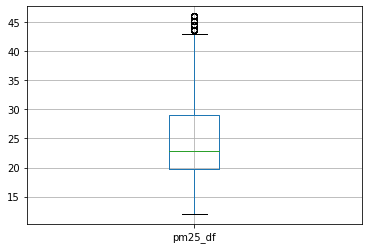

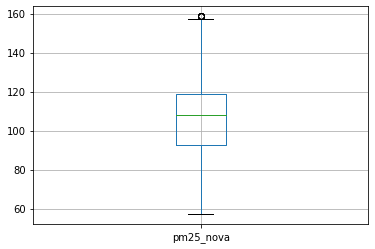

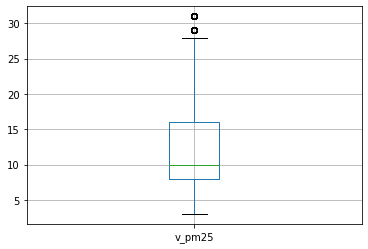

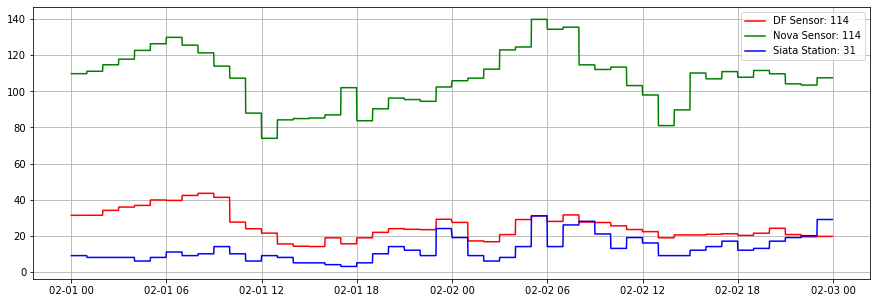

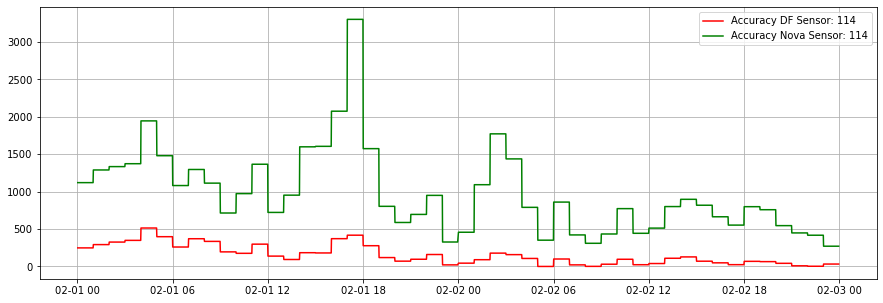

In [33]:
#boxplot
plt.figure()
bp=df_window.boxplot(column="pm25_df", return_type='both')
plt.figure()
df_window.boxplot(column="pm25_nova")
plt.figure()
df_window.boxplot(column="v_pm25")


#Measurement
plt.figure(figsize=(15,5))
plt.plot(df_window["fechaHora"],df_window["pm25_df_ave"],"r-",label="DF Sensor: %d"%(nube))
plt.plot(df_window["fechaHora"],df_window["pm25_nova_ave"],"g-",label="Nova Sensor: %d"%(nube))
plt.plot(df_window["fechaHora"],df_window["v_pm25"],"b-",label="Siata Station: %d"%(Closest_Station))
plt.legend()
plt.grid()

#alpha %
plt.figure(figsize=(15,5))
plt.plot(df_window["fechaHora"],df_window["alpha_df"],"r-",label="Accuracy DF Sensor: %d"%(nube))
plt.plot(df_window["fechaHora"],df_window["alpha_nova"],"g-",label="Accuracy Nova Sensor: %d"%(nube))
plt.legend()
plt.grid()


COMPARING ACCURACY VS DISTANCE

In [6]:
inicio="2020-02-01 00:00:00"
fin=   "2020-02-02 23:59:00"
ma=60
nube=0
acc_vs_dis=[]
contador=0
for nube in CC.keys():
    contador+=1
    

    CC[nube]["v_pm25"] = np.nan
    CC[nube]["alpha_df"] = np.nan
    CC[nube]["alpha_nova"] = np.nan
    del df_window
    df_window=CC[nube][(CC[nube]['fechaHora'] >= inicio) & (CC[nube]['fechaHora'] <= fin)]
    
    #Remove outliers that are out of range, from documentation both nova and df range of measurements are [0,999]

    df_window=df_window.copy()
    df_window.loc[df_window["pm25_nova"]>999,"pm25_nova"]=np.nan
    df_window.loc[df_window["pm25_nova"]<0,"pm25_nova"]=np.nan
    df_window.loc[df_window["pm25_df"]>999,"pm25_df"]=np.nan
    df_window.loc[df_window["pm25_df"]<0,"pm25_df"]=np.nan
    
    #Remove data above the whiskers of the boxplot
    Q1 = df_window['pm25_df'].quantile(0.25)
    Q3 = df_window['pm25_df'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    df_window.loc[df_window["pm25_df"]>=Q3 + 1.5 *IQR,"pm25_df"]=np.nan
    
    Q1 = df_window['pm25_nova'].quantile(0.25)
    Q3 = df_window['pm25_nova'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    df_window.loc[df_window["pm25_nova"]>=Q3 + 1.5 *IQR,"pm25_nova"]=np.nan
    
    #Moving average /lpf
    #df_window['pm25_nova_lpf'] = df_window.pm25_nova.rolling(window=ma,min_periods=1).mean()
    #df_window['pm25_df_lpf'] = df_window.pm25_df.rolling(window=ma,min_periods=1).mean()
    
    #Hourly mean
    df_window['pm25_nova_ave']=np.nan
    df_window['pm25_df_ave']=np.nan
    
    for ts in df_window['fechaHora']:
        if ts==ts.ceil('60min'):
            window=df_window[(df_window['fechaHora'] >= ts.floor('60min')) & (df_window['fechaHora'] < (ts+timedelta(minutes = 1)).ceil('60min'))]
            
        else:
            window=df_window[(df_window['fechaHora'] >= ts.floor('60min')) & (df_window['fechaHora'] < ts.ceil('60min'))]
        #print("Timestamp: ",ts,", Floor:",ts.floor('60min'),", Ceil:",ts.ceil('60min'),window['pm25_nova'].mean())
        #print(window['pm25_nova'])
        df_window.loc[df_window["fechaHora"]==ts,'pm25_nova_ave']=window['pm25_nova'].mean()
        df_window.loc[df_window["fechaHora"]==ts,'pm25_df_ave']=window['pm25_df'].mean()
        
    #del window

    
    Closest_Station=Distances.codigoSerial_ES.loc[nube]
    print("%d. Nube: %d, Estación: %d, Distancia: %s km" %(contador, nube, Closest_Station, Distances.Distancia_a_ES.loc[nube]))
    
    if Closest_Station in SS.keys():
        #Clean values out of range
        SS[Closest_Station].loc[SS[Closest_Station]["pm25"]<=0,"pm25"]=np.nan
        for time in df_window.fechaHora:
            #idx=SS[Closest_Station].Fecha_Hora.searchsorted(time,side="left")
            ##print(idx, SS[Closest_Station].Fecha_Hora.loc[idx], time)
            #v=SS[Closest_Station].pm25.loc[idx]
            #df_window.v_pm25[(df_window.fechaHora == time)]=v
            #vm=df_window.pm25_df_ave[(df_window.fechaHora == time)]
            ##print(time," : ",vm.values[0],"________",SS[Closest_Station].Fecha_Hora.loc[idx]," : ",v)
            #df_window.alpha_df[(df_window.fechaHora == time)]=100*abs(vm-v)/v
            #vm=df_window.pm25_nova_ave[(df_window.fechaHora == time)]
            #df_window.alpha_nova[(df_window.fechaHora == time)]=100*abs(vm-v)/v
            
            idx=SS[Closest_Station].Fecha_Hora.searchsorted(time,side="right")
            #print(idx, SS[Closest_Station].Fecha_Hora.loc[idx], time)
            v=SS[Closest_Station].loc[idx,"pm25"]
            df_window.loc[df_window.fechaHora == time,"v_pm25"]=v
            vm=df_window.loc[(df_window.fechaHora == time),"pm25_df_ave"]
            #print(time," : ",vm.values[0],"________",SS[Closest_Station].Fecha_Hora.loc[idx]," : ",v)
            df_window.loc[df_window.fechaHora == time,"alpha_df"]=100*abs(vm-v)/v
            vm=df_window.loc[(df_window.fechaHora == time),"pm25_nova_ave"]
            df_window.loc[df_window.fechaHora == time,"alpha_nova"]=100*abs(vm-v)/v
        
        acc_vs_dis+=[[nube,Distances.loc[nube,"Distancia_a_ES"],df_window.alpha_nova.mean(),df_window.alpha_df.mean()]]
    #print("Average error for Nova sensor: %s %% and DF sensor: %s %%"%(df_window.alpha_nova.mean(),df_window.alpha_df.mean())) 
acc_vs_dis

1. Nube: 220, Estación: 82, Distancia: 1.508 km
2. Nube: 1, Estación: 80, Distancia: 1.036 km
3. Nube: 192, Estación: 83, Distancia: 2.33 km
4. Nube: 261, Estación: 25, Distancia: 1.366 km
5. Nube: 262, Estación: 25, Distancia: 1.366 km
6. Nube: 104, Estación: 79, Distancia: 0.9575 km
7. Nube: 143, Estación: 83, Distancia: 0.79 km
8. Nube: 80, Estación: 85, Distancia: 3.21 km
9. Nube: 169, Estación: 12, Distancia: 0.6406 km
10. Nube: 138, Estación: 84, Distancia: 2.1 km
11. Nube: 140, Estación: 80, Distancia: 0.2773 km
12. Nube: 160, Estación: 12, Distancia: 0.819 km
13. Nube: 142, Estación: 84, Distancia: 2.908 km
14. Nube: 129, Estación: 88, Distancia: 1.486 km
15. Nube: 34, Estación: 78, Distancia: 0.4207 km
16. Nube: 175, Estación: 28, Distancia: 1.726 km
17. Nube: 89, Estación: 3, Distancia: 0.6123 km
18. Nube: 49, Estación: 81, Distancia: 7.125 km
19. Nube: 87, Estación: 87, Distancia: 1.164 km
20. Nube: 240, Estación: 84, Distancia: 2.08 km
21. Nube: 163, Estación: 86, Distancia

[[220, 1.508, nan, nan],
 [1, 1.036, 41.80216922793663, 84.49094958338286],
 [192, 2.33, 421.9970313888916, 502.4934346356233],
 [261, 1.366, nan, nan],
 [262, 1.366, nan, nan],
 [104, 0.9575, 58.65392617010149, 93.98618162630999],
 [143, 0.79, 412.1371615147804, 548.2513614805497],
 [80, 3.21, nan, nan],
 [169, 0.6406, 44.24854425054476, 83.66264737583836],
 [138, 2.1, nan, nan],
 [140, 0.2773, nan, nan],
 [160, 0.819, nan, nan],
 [142, 2.908, 102.6295954121003, 136.52141823045835],
 [129, 1.486, nan, nan],
 [34, 0.4207, 174.84691545106833, 172.58022697643077],
 [175, 1.726, 100.36654460489513, 138.5706395999859],
 [49, 7.125, nan, nan],
 [87, 1.164, nan, 275.03455065689303],
 [240, 2.08, 80.5110286657801, nan],
 [163, 0.61, nan, 112.13108609413064],
 [18, 1.705, 103.27863397176287, 150.19855622608404],
 [74, 1.435, 51.36200770358931, 61.12967118719696],
 [37, 2.31, 518.0609416251361, 388.4606799233665],
 [179, 7.082, nan, nan],
 [234, 4.918, 165.46944158841274, 185.3536927865228],
 [

In [7]:
lst2dtf = pd.DataFrame(acc_vs_dis,columns =['nube', 'dist', 'acc_nova', 'acc_df'])
lst2dtf.set_index('nube',inplace=True)
lst2dtf["acc_nova"][lst2dtf["acc_nova"]==np.inf]=np.nan
lst2dtf["acc_df"][lst2dtf["acc_df"]==np.inf]=np.nan
#lst2dtf.head(60)

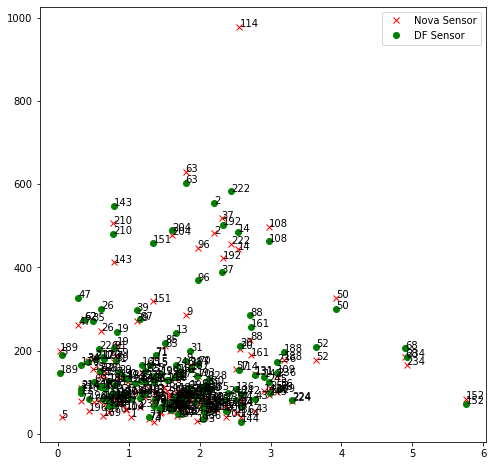

In [8]:
plt.figure(figsize=(8,8))

plt.plot(lst2dtf["dist"],lst2dtf["acc_nova"],'rx',label="Nova Sensor")
for i in lst2dtf.index:
    if not np.isnan(lst2dtf["acc_nova"].loc[i]):
        plt.text(lst2dtf["dist"].loc[i],lst2dtf["acc_nova"].loc[i],i)
#plt.figure(figsize=(10,10))
plt.legend()
plt.grid()


plt.plot(lst2dtf["dist"],lst2dtf["acc_df"],'go',label="DF Sensor")

for i in lst2dtf.index:
    if not np.isnan(lst2dtf["acc_df"].loc[i]):
        plt.text(lst2dtf["dist"].loc[i],lst2dtf["acc_df"].loc[i],i)

plt.legend()
plt.grid()

EVALUATING COMPLETENESS

In [9]:
inicio="2020-02-01 00:00:00"
fin=   "2020-02-02 23:59:00"
nube=0
missing_data_df=[]
missing_data_nova=[]
contador=0
df_comple = pd.DataFrame(columns =["codigoSerial","completeness_df","completeness_nova","completeness_group_df","completeness_group_nova"])
for nube in CC.keys():
    contador+=1
    CC[nube]["v_pm25"] = np.nan
    CC[nube]["alpha_df"] = np.nan
    CC[nube]["alpha_nova"] = np.nan
    df_window=CC[nube].loc[(CC[nube]['fechaHora'] >= inicio) & (CC[nube]['fechaHora'] <= fin)]
    
    #Remove outliers that are out of range, from documentation both nova and df range of measurements are [0,999]
    df_window=df_window.copy()
    df_window.loc[df_window["pm25_nova"]>999,"pm25_nova"]=np.nan
    df_window.loc[df_window["pm25_nova"]<0,"pm25_nova"]=np.nan
    df_window.loc[df_window["pm25_df"]>999,"pm25_df"]=np.nan
    df_window.loc[df_window["pm25_df"]<0,"pm25_df"]=np.nan
    
    #Remove data above the whiskers of the boxplot
    Q1 = df_window['pm25_df'].quantile(0.25)
    Q3 = df_window['pm25_df'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    df_window.loc[df_window["pm25_df"]>=Q3 + 1.5 *IQR,"pm25_df"]=np.nan
    
    Q1 = df_window['pm25_nova'].quantile(0.25)
    Q3 = df_window['pm25_nova'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    df_window.loc[df_window["pm25_nova"]>=Q3 + 1.5 *IQR,"pm25_nova"]=np.nan
    
    ref_date_range = pd.date_range(inicio, fin, freq='1Min')
    ref_date_range = pd.DataFrame(ref_date_range,columns=["ref_fechaHora"])
    
    #df_window=df_window.drop(labels=59, axis=0) #TO DROP A ROW
    #df_window=df_window.drop(labels=115, axis=0) #TO DROP A ROW
    
    #Check for any missing date
    missing_dates = ref_date_range.loc[~ref_date_range.ref_fechaHora.isin(df_window.fechaHora),"ref_fechaHora"]
    #print("Amount of Missing dates:", np.size(missing_dates), ", Completeness: ", 1-np.size(missing_dates)/np.size(ref_date_range))
    #print(missing_dates)
    #Add missing date rows
    for missing in missing_dates:
        df_window=df_window.append({"codigoSerial":nube,"fechaHora":missing}, ignore_index = True)
    
    #Check for any missing date
    missing_dates = ref_date_range.loc[~ref_date_range.ref_fechaHora.isin(df_window.fechaHora),"ref_fechaHora"]
    #print("Amount of Missing dates:", np.size(missing_dates), ", Completeness: ", 1-np.size(missing_dates)/np.size(ref_date_range))
    
    #Check for missing data
    missing_data_df=np.count_nonzero(np.isnan(df_window['pm25_df']))
    missing_data_nova=np.count_nonzero(np.isnan(df_window['pm25_nova']))
    comp_df=100*(1-missing_data_df/np.size(df_window.pm25_df))
    comp_nova=100*(1-missing_data_nova/np.size(df_window.pm25_nova))
    
    
    if comp_df<50:
        group_df=0
    elif 50<=comp_df<75:
        group_df=1
    elif  75<=comp_df<90:
        group_df=2
    elif  90<=comp_df:
        group_df=3
    
    if comp_nova<50:
        group_nova=0
    elif  50<=comp_nova<75:
        group_nova=1
    elif  75<=comp_nova<90:
        group_nova=2
    elif  90<=comp_nova:
        group_nova=3        
        
    df_comple=df_comple.append({"codigoSerial":nube,"completeness_df":comp_df,"completeness_nova":comp_nova,"completeness_group_df":group_df,"completeness_group_nova":group_nova}, ignore_index = True)
    
    print("%d. Nube: %d, Completeness DF Sensor: %d, Nova Sensor %d" %(contador,nube,comp_df,comp_nova))

1. Nube: 220, Completeness DF Sensor: 0, Nova Sensor 0
2. Nube: 1, Completeness DF Sensor: 92, Nova Sensor 95
3. Nube: 192, Completeness DF Sensor: 99, Nova Sensor 97
4. Nube: 261, Completeness DF Sensor: 0, Nova Sensor 0
5. Nube: 262, Completeness DF Sensor: 0, Nova Sensor 0
6. Nube: 104, Completeness DF Sensor: 99, Nova Sensor 93
7. Nube: 143, Completeness DF Sensor: 99, Nova Sensor 95
8. Nube: 80, Completeness DF Sensor: 0, Nova Sensor 0
9. Nube: 169, Completeness DF Sensor: 99, Nova Sensor 91
10. Nube: 138, Completeness DF Sensor: 0, Nova Sensor 0
11. Nube: 140, Completeness DF Sensor: 0, Nova Sensor 0
12. Nube: 160, Completeness DF Sensor: 0, Nova Sensor 0
13. Nube: 142, Completeness DF Sensor: 99, Nova Sensor 94
14. Nube: 129, Completeness DF Sensor: 0, Nova Sensor 0
15. Nube: 34, Completeness DF Sensor: 91, Nova Sensor 86
16. Nube: 175, Completeness DF Sensor: 99, Nova Sensor 97
17. Nube: 89, Completeness DF Sensor: 0, Nova Sensor 0
18. Nube: 49, Completeness DF Sensor: 0, Nova 

In [24]:
dic_df={}
dic_nova={}
grouped_df=df_comple.groupby(df_comple.completeness_group_df)
grouped_nova=df_comple.groupby(df_comple.completeness_group_nova)
for i in df_comple.completeness_group_df.unique():
    dic_df[i]=grouped_df.get_group(i).sort_values(by=['codigoSerial'],ignore_index=True).codigoSerial.tolist()

for i in df_comple.completeness_group_nova.unique():
    dic_nova[i]=grouped_nova.get_group(i).sort_values(by=['codigoSerial'],ignore_index=True).codigoSerial.tolist()


{0.0: [3.0, 15.0, 27.0, 30.0, 38.0, 39.0, 40.0, 48.0, 49.0, 51.0, 53.0, 55.0, 58.0, 66.0, 70.0, 72.0, 73.0, 76.0, 79.0, 80.0, 82.0, 83.0, 84.0, 86.0, 87.0, 89.0, 94.0, 95.0, 97.0, 99.0, 105.0, 106.0, 117.0, 119.0, 123.0, 127.0, 129.0, 133.0, 138.0, 140.0, 144.0, 150.0, 154.0, 156.0, 159.0, 160.0, 162.0, 163.0, 168.0, 171.0, 172.0, 173.0, 174.0, 176.0, 178.0, 179.0, 180.0, 182.0, 184.0, 193.0, 198.0, 201.0, 202.0, 203.0, 215.0, 216.0, 219.0, 220.0, 221.0, 223.0, 227.0, 229.0, 230.0, 231.0, 232.0, 233.0, 238.0, 243.0, 244.0, 249.0, 250.0, 251.0, 259.0, 261.0, 262.0, 265.0, 266.0, 267.0], 3.0: [1.0, 2.0, 4.0, 5.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 18.0, 19.0, 22.0, 24.0, 26.0, 28.0, 31.0, 32.0, 33.0, 35.0, 36.0, 37.0, 42.0, 43.0, 45.0, 46.0, 47.0, 50.0, 52.0, 54.0, 56.0, 57.0, 61.0, 62.0, 63.0, 65.0, 67.0, 68.0, 71.0, 74.0, 75.0, 78.0, 81.0, 88.0, 90.0, 96.0, 100.0, 104.0, 107.0, 108.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 118.0, 120.0, 121.0, 122.0, 124.0, 125.0, 130.0, 131.0, 134.

<AxesSubplot:>

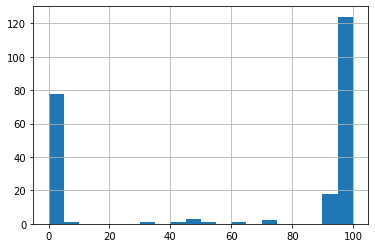

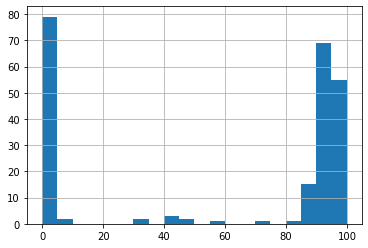

In [36]:
print(dic_nova)
print(dic_df)

df_comple.completeness_df.hist(bins=20)
plt.figure()
df_comple.completeness_nova.hist(bins=20)

Test code

In [4]:
#index=list of indexes, can be obtained from a condition.
#df.loc[index,required columns]



#Calculation that involve .nan values
df = pd.DataFrame(np.ones(5), columns=["A"])
print(df,"\n")
df.loc[2]=np.nan
print(df,"\n")
df.A=df.A*2+1
print(df,"\n")
print(df.A.mean())
2/np.nan

     A
0  1.0
1  1.0
2  1.0
3  1.0
4  1.0 

     A
0  1.0
1  1.0
2  NaN
3  1.0
4  1.0 

     A
0  3.0
1  3.0
2  NaN
3  3.0
4  3.0 

3.0


nan